In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('phones_data.csv')
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


# Ensuring Data Reliability

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [5]:
df.count()

brand_name        1224
model_name        1224
os                1027
popularity        1224
best_price        1224
lowest_price       964
highest_price      964
sellers_amount    1224
screen_size       1222
memory_size       1112
battery_size      1214
release_date      1224
dtype: int64

In [6]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


<AxesSubplot:>

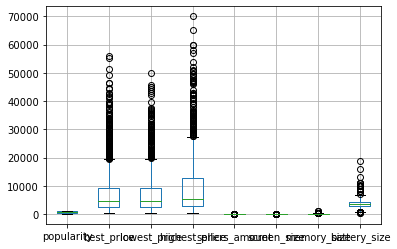

In [7]:
df.boxplot()

In [8]:
#Evaluating outliers
df.quantile([0,0.25,0.5,0.75,1])

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0.00,1.00,214.00,198.00,229.00,1.0,1.4000,0.0032,460.0
0.25,306.75,2599.75,2399.00,2887.00,2.0,5.1625,32.0000,2900.0
0.50,612.50,4728.00,4574.00,5325.50,8.0,6.0000,64.0000,3687.0
0.75,918.25,9323.00,9262.25,12673.75,26.0,6.4000,128.0000,4400.0
1.00,1224.00,56082.00,49999.00,69999.00,125.0,8.1000,1000.0000,18800.0


In [9]:
#Popularity_Outliers
Pop_Q1=df['popularity'].quantile(0.25)
Pop_Q3=df['popularity'].quantile(0.75)
Pop_IQR = Pop_Q3 - Pop_Q1
Pop_upper = Pop_Q3 + Pop_IQR*1.5
Pop_lower = Pop_Q1 - Pop_IQR*1.5
Pop_outlier = df[(df['popularity']>Pop_upper)|(df['popularity']<Pop_lower)]
Pop_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date


In [10]:
#No outliers in popularity

In [11]:
#best_price_Outliers
best_price_Q1=df['best_price'].quantile(0.25)
best_price_Q3=df['best_price'].quantile(0.75)
best_price_IQR = best_price_Q3 - best_price_Q1
best_price_upper = best_price_Q3 + best_price_IQR*1.5
best_price_lower = best_price_Q1 - best_price_IQR*1.5
best_price_outlier = df[(df['best_price']>Pop_upper)|(df['best_price']<Pop_lower)]
best_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020
5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,6-2018
6,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.0,3400.0,12-2018
7,Honor,10 Lite 4/64GB Black,Android,134,4973.0,4733.0,5295.0,6,6.21,64.0,3400.0,1-2019
8,Honor,10 lite 3/128GB Blue,Android,477,5100.0,4990.0,5222.0,3,6.21,128.0,3400.0,1-2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,9-2018
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,11-2019


In [12]:
#removing_best_price _outlier
df=df[~(df['best_price']>Pop_upper)|(df['best_price']<Pop_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.000,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nomi,i284 Black,NaN,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,Nomi,i284 Red,NaN,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,Nomi,i284 Violet-blue,NaN,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,Nomi,i285 X-Treme Black-Yellow,NaN,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [13]:
#best_price_Outliers
sellers_amount_Q1=df['sellers_amount'].quantile(0.25)
sellers_amount_Q3=df['sellers_amount'].quantile(0.75)
sellers_amount_IQR = sellers_amount_Q3 - sellers_amount_Q1
sellers_amount_upper = sellers_amount_Q3 + sellers_amount_IQR*1.5
sellers_amount_lower = sellers_amount_Q1 - sellers_amount_IQR*1.5
sellers_amount_outlier = df[(df['sellers_amount']>sellers_amount_upper)|(df['sellers_amount']<sellers_amount_lower)]
sellers_amount_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
963,Sigma mobile,X-style 18 TRACK Black,NaN,483,328.0,299.0,368.0,109,1.77,NaN,1000.0,2-2020


In [14]:
#removing_sellers_outlier
df=df[~(df['sellers_amount']>sellers_amount_upper)|(df['sellers_amount']<sellers_amount_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.000,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.000,2000.0,9-2020
12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nomi,i284 Black,NaN,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,Nomi,i284 Red,NaN,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,Nomi,i284 Violet-blue,NaN,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,Nomi,i285 X-Treme Black-Yellow,NaN,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [15]:
#lowest_price_Outliers
lowest_price_Q1=df['lowest_price'].quantile(0.25)
lowest_price_Q3=df['lowest_price'].quantile(0.75)
lowest_price_IQR = lowest_price_Q3 - lowest_price_Q1
lowest_price_upper = lowest_price_Q3 + lowest_price_IQR*1.5
lowest_price_lower = lowest_price_Q1 - lowest_price_IQR*1.5
lowest_price_outlier = df[(df['lowest_price']>lowest_price_upper)|(df['lowest_price']<lowest_price_lower)]
lowest_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
273,ZTE,Blade L210 1/32GB Black,Android,642,1801.0,1678.0,2009.0,39,6.0,32.0,2600.0,9-2020
274,ZTE,Blade L210 1/32GB Blue,Android,399,1789.0,1678.0,1979.0,42,6.0,32.0,2600.0,9-2020
275,ZTE,Blade L210 1/32GB Blue,Android,418,1789.0,1678.0,1979.0,42,6.0,32.0,2600.0,9-2020
718,Tecno,POP 3 BB2 1/16GB DS Sandstone Black (489518075...,Android,468,1810.0,1629.0,1979.0,39,5.7,16.0,3500.0,7-2020


In [16]:
#removing_lowest_price_outlier
df= df[~(df['lowest_price']>lowest_price_upper)|(df['lowest_price']<lowest_price_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.000,2000.0,10-2020
12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
15,Nokia,105 Dual Sim New Black (A00028315),NaN,507,552.0,499.0,606.0,2,1.80,0.004,800.0,9-2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nomi,i284 Black,NaN,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,Nomi,i284 Red,NaN,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,Nomi,i284 Violet-blue,NaN,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,Nomi,i285 X-Treme Black-Yellow,NaN,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [17]:
#highest_price_Outliers
highest_price_Q1=df['highest_price'].quantile(0.25)
highest_price_Q3=df['highest_price'].quantile(0.75)
highest_price_IQR = highest_price_Q3 - highest_price_Q1
highest_price_upper = highest_price_Q3 + highest_price_IQR*1.5
highest_price_lower = highest_price_Q1 - highest_price_IQR*1.5
highest_price_outlier = df[(df['highest_price']>highest_price_upper)|(df['highest_price']<highest_price_lower)]
highest_price_outlier

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
213,CAT,B26 Black,NaN,1084,1488.0,1330.0,1819.0,52,2.4,NaN,1500.0,12-2019
277,ZTE,Blade L8 1/16GB Blue,Android,691,1529.0,1368.0,1917.0,45,5.0,16.0,2000.0,6-2019
575,AGM,M3 Black,NaN,387,1484.0,1189.0,1881.0,4,2.4,NaN,1970.0,12-2019


In [18]:
#removing_highest_price_outlier
df=df[~(df['highest_price']>highest_price_upper)|(df['highest_price']<highest_price_lower)]
df

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
15,Nokia,105 Dual Sim New Black (A00028315),NaN,507,552.0,499.0,606.0,2,1.80,0.004,800.0,9-2017
16,Nokia,105 Single Sim 2019 Black (16KIGB01A13),NaN,805,536.0,449.0,642.0,31,1.77,NaN,800.0,11-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Nomi,i284 Black,NaN,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,Nomi,i284 Red,NaN,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,Nomi,i284 Violet-blue,NaN,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,Nomi,i285 X-Treme Black-Yellow,NaN,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [19]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,207.000000,207.000000,168.000000,168.000000,207.000000,206.000000,98.000000,207.000000
mean,402.623188,745.154589,637.559524,812.351190,18.782609,2.603447,2.758122,1709.516908
std,256.079560,409.015697,332.173926,387.774027,15.689217,1.005063,5.332811,1824.736916
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.004000,460.000000
25%,207.500000,428.500000,393.000000,538.000000,3.500000,1.800000,0.032000,800.000000
50%,390.000000,649.000000,559.000000,719.000000,19.000000,2.400000,0.032000,1150.000000
75%,572.000000,921.000000,764.000000,1049.000000,30.500000,2.800000,0.064000,2000.000000
max,1021.000000,1799.000000,1594.000000,1799.000000,75.000000,5.500000,16.000000,18800.000000


<AxesSubplot:>

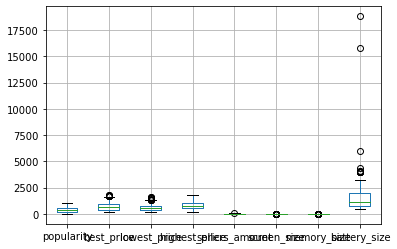

In [20]:
df.boxplot()

In [21]:
df.count()

brand_name        207
model_name        207
os                 24
popularity        207
best_price        207
lowest_price      168
highest_price     168
sellers_amount    207
screen_size       206
memory_size        98
battery_size      207
release_date      207
dtype: int64

In [22]:
df.dtypes

brand_name         object
model_name         object
os                 object
popularity          int64
best_price        float64
lowest_price      float64
highest_price     float64
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
release_date       object
dtype: object

In [23]:
screen_size_mode=df['screen_size'].mode()
screen_size_mode

0    2.4
dtype: float64

In [24]:
df['screen_size'].fillna('2.4', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
df.shape

(207, 12)

In [26]:
df.drop(columns=["os"], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df.head()

,brand_name,model_name,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
12,Nokia,105 DS 2019 Pink (16KIGP01A01),18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
15,Nokia,105 Dual Sim New Black (A00028315),507,552.0,499.0,606.0,2,1.8,0.004,800.0,9-2017
16,Nokia,105 Single Sim 2019 Black (16KIGB01A13),805,536.0,449.0,642.0,31,1.77,NaN,800.0,11-2019


# Establishing Correlations

In [28]:
df.describe(include=['object'])

,brand_name,model_name,screen_size,release_date
count,207,207,207.0,207
unique,29,172,19.0,52
top,Sigma mobile,A170 Point Dark Blue,2.4,1-2020
freq,31,3,74.0,11


In [29]:
df[['popularity','best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']].corr()

,popularity,best_price,lowest_price,highest_price,sellers_amount,memory_size,battery_size
popularity,1.000000,0.114299,0.166363,0.214593,0.441604,0.067165,0.067682
best_price,0.114299,1.000000,0.992130,0.966752,-0.034929,0.795311,0.364797
lowest_price,0.166363,0.992130,1.000000,0.949047,0.052830,0.661989,0.387581
highest_price,0.214593,0.966752,0.949047,1.000000,0.134404,0.614886,0.332489
sellers_amount,0.441604,-0.034929,0.052830,0.134404,1.000000,-0.233018,-0.043658
memory_size,0.067165,0.795311,0.661989,0.614886,-0.233018,1.000000,0.573123
battery_size,0.067682,0.364797,0.387581,0.332489,-0.043658,0.573123,1.000000


In [30]:
from scipy import stats

# Is seller_amounts correlated with popularity?

In [31]:
pearson_coef, p_value=stats.pearsonr(df['sellers_amount'],df['popularity'])
pearson_coef, p_value

(0.44160433203296523, 2.7259166328894774e-11)

## Somehow correlated and this corrlation isn't due to chance

Text(0.5, 1.0, 'Popularity VS Sellers_Amount')

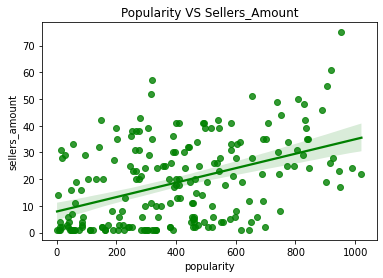

In [32]:
sns.regplot(x='popularity',y='sellers_amount', data=df, color='green')
plt.title('Popularity VS Sellers_Amount')

Text(0.5, 1.0, 'Popularity VS Sellers_Amount')

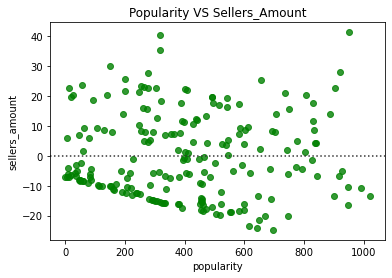

In [33]:
sns.residplot(x='popularity',y='sellers_amount', data=df, color='green')
plt.title('Popularity VS Sellers_Amount')

# So, both sellers amount and popularity are strongly correlated

#### so, as shown , there is a strong positive correlation. This correlation is statistically significant and not due to chance

**lets examine screen size vs best price**

In [34]:
pearson_coef, p_value =stats.pearsonr(df['screen_size'],df['best_price'])
pearson_coef, p_value

(0.7528725136536704, 4.2270732450772e-39)

### The correlation is  strong positive  and it's statistically significant and not due to chance

Text(0.5, 1.0, 'Screen Size Vs Best Price')

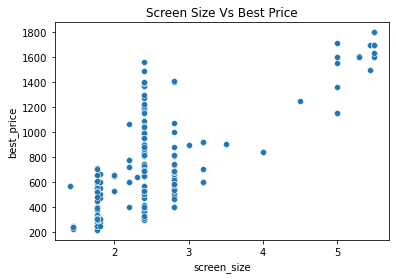

In [35]:
sns.scatterplot(x='screen_size',y='best_price',data=df)
plt.title('Screen Size Vs Best Price')

# so we could say that popularity could be a good indicator for seller amounts and screen size is a very good indicator for price

In [36]:
#so lets examine categorical variables

In [37]:
brand_category=df.groupby('brand_name')['best_price'].mean()
brand_category=brand_category.to_frame().reset_index()
brand_category

,brand_name,best_price
0,2E,843.272727
1,AGM,1491.000000
2,ALCATEL,771.000000
3,Archos,1269.500000
4,Assistant,763.666667
5,Astro,470.800000
6,Blackview,992.000000
7,ERGO,513.666667
8,Fly,487.400000
9,Globex,652.000000


In [38]:
brand_category.sort_values('best_price', ascending=False, axis=0, inplace=True)

In [39]:
#Top 10 Brands by price
brand_category=brand_category.head(10)
brand_category.set_index('brand_name', inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by best price')

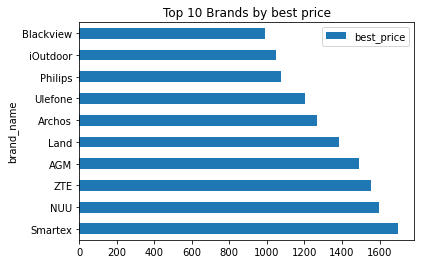

In [40]:
brand_category.plot(kind='barh')
plt.title('Top 10 Brands by best price')

In [41]:
#smartex is the best price brand followed by nuu

In [42]:
#most_popular
Popularity_category=df.groupby('brand_name')['popularity'].sum()
Popularity_category=Popularity_category.to_frame().reset_index()
Popularity_category

,brand_name,popularity
0,2E,4489
1,AGM,380
2,ALCATEL,2863
3,Archos,1082
4,Assistant,753
5,Astro,2953
6,Blackview,688
7,ERGO,5514
8,Fly,3275
9,Globex,919


In [43]:
Popularity_category.sort_values('popularity', ascending=False, axis=0, inplace=True)

In [44]:
#Top 10 Brands by popularity
Popularity_category=Popularity_category.head(10)
Popularity_category.set_index('brand_name', inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by popularity')

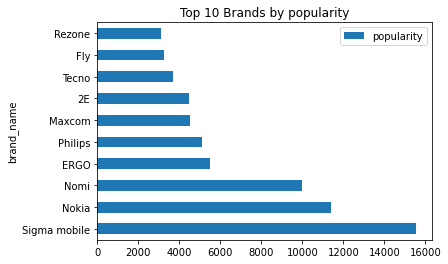

In [45]:
Popularity_category.plot(kind='barh')
plt.title("Top 10 Brands by popularity")

In [46]:
#sigma is the most popular followed by nokia

In [47]:
#highest_price_popular
highest_price_category=df.groupby('brand_name')['highest_price'].mean()
highest_price_category=highest_price_category.to_frame().reset_index()
highest_price_category

,brand_name,highest_price
0,2E,890.333333
1,AGM,1767.000000
2,ALCATEL,945.000000
3,Archos,NaN
4,Assistant,494.500000
5,Astro,609.000000
6,Blackview,1186.000000
7,ERGO,446.583333
8,Fly,630.200000
9,Globex,705.000000


In [48]:
highest_price_category.sort_values('highest_price', ascending=False, axis=0, inplace=True)

In [49]:
#Top 10 Brands by highest price
highest_price_category=highest_price_category.head(10)
highest_price_category.set_index('brand_name', inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by highest_price')

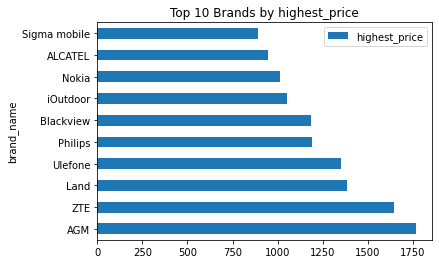

In [50]:
highest_price_category.plot(kind='barh')
plt.title("Top 10 Brands by highest_price")

In [51]:
#highest price is AGM followed by ZTE

In [52]:
#lowest_price_popular
lowest_price_category=df.groupby('brand_name')['lowest_price'].mean()
lowest_price_category=lowest_price_category.to_frame().reset_index()
lowest_price_category

,brand_name,lowest_price
0,2E,741.111111
1,AGM,1192.000000
2,ALCATEL,748.000000
3,Archos,NaN
4,Assistant,304.000000
5,Astro,427.666667
6,Blackview,900.000000
7,ERGO,383.916667
8,Fly,430.000000
9,Globex,600.000000


In [53]:
lowest_price_category.sort_values('lowest_price', ascending=False, axis=0, inplace=True)

In [54]:
#Top 10 Brands by lowest price
lowest_price_category=lowest_price_category.head(10)
lowest_price_category.set_index('brand_name', inplace=True)

Text(0.5, 1.0, 'Top 10 Brands by lowest_price')

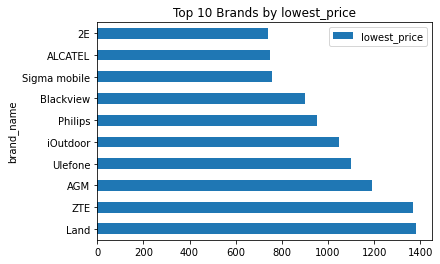

In [55]:
lowest_price_category.plot(kind='barh')
plt.title("Top 10 Brands by lowest_price")

In [56]:
# lowest price land and zte, seems zte has a wide variety range of products

# Data Findings:
    1-screen size is a very good indicator of price
    2-popularity could be an indicator for seller amounts
    3-sigma is the most popular followed by nokia
    4-highest price is AGM followed by ZTE
    5-lowest price land and zte, seems zte has a wide variety range of products
    6-smartex is the best price brand followed by nuu

In [57]:
df.to_csv('Mobile_phones.csv')